**2. So sánh L1 loss (absolute error) và L2 loss (squared error). Nếu ưu nhược điểm của chúng.**

$L_1$ Loss Function is the sum of the all the absolute differences between the true value and the predicted value.
$$L_1 = |o -y|$$
$L_2$ Loss Function is the sum of the all the squared differences between the true value and the predicted value.
$$L_2 = (o-y)^2$$
For $x\in\mathbb{R}^{m+1}$, the gradient of $L_1$ and $L_2$:

$$\textbf{L}_\textbf{1w}'  = \textbf{x}\frac{|o-y|}{o-y}$$

$$\textbf{L}_\textbf{2w}' = 2\textbf{x}(o-y)$$

As we can see:
- $L_2$ is much more sensitive to outliers than $L_1$ because of the larger error ($(o - y)$ vs $(o-y)^2$). This can make our model less accurate while minizing the loss. So $L_1$ is more robust than $L_2$
- $L_2$ is more stable than $L_1$ because it decreases quickly, when the distance $(o - y)$ is large, and it converges gradually when the predicted value reach the true value. On the other hand, the gradient of $L_1$ has an independent of error $(o - y)$ magnitude, so the weight change is also independent of this error. It turns out that we could end up easily with a local minimum of the loss function or taking longer to converge to the global minimum. 


**3. Tìm hiểu về Huber loss và cách Huber loss khắc phục nhược điểm của 2 hàm loss trên. Cài đặt Huber loss cho các chương trình ở file D5, D6, D7, D8.**

Huber loss:

$$L_\delta(y,o) = 
\begin{cases}
\frac{1}{2}(o-y)^2 \qquad \qquad for \ |o-y| \leq \delta, \\
\delta|o-y| - \frac{1}{2}\delta^2 \ \qquad otherwise.
\end{cases}$$

Gradient of Huber loss:

$$\frac{\partial L_\delta(y,o)}{\partial \textbf{w}} = 
\begin{cases}
\textbf{x}(o-y) \qquad for \ |o-y| \leq \delta, \\
\delta\textbf{x}\frac{|o-y|}{o-y}\ \qquad otherwise.
\end{cases}$$

This function is quadratic for small values of error (as $L_2$), and linear for large values (as $L_1$). It's a combination between $L_1$ and $L_2$, so it is very robust to outliers ($L_1$'s property) and converges to the global minimum of the loss function quickly and stably ($L_2$'s property).

- m-sample naive implementation

theta:  [1.23071961 0.32193653]


[Text(0.5, 0, 'areas'), Text(0, 0.5, 'prices')]

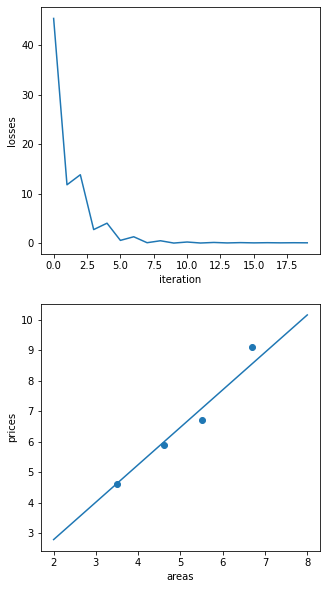

In [1]:
# load data
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1]
data_size = areas.size

# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]

# init weight
eta = 0.01
theta = np.array([-0.34, 0.04]) #[w, b]
delta = 10 # hyperparameter

# how long
epoch_max = 10

# mini-batch size
m = 2

losses = [] # for debug
for epoch in range(epoch_max):    
    for j in range(0, data_size, m):
        
        gradients = np.zeros((2,))
        sum_of_losses = 0
        if j+m >= data_size:
            k = data_size
        else:
            k = j + m
        for index in range(j, k):
            xi = data[index]
            yi = prices[index]      

            # predict z/o
            oi = xi.dot(theta)

            err = oi - yi
            if np.absolute(err) <= delta:
                # compute loss
                li = err*err/2  

                # compute gradient
                gradient_i = xi*err
            else:
                # compute loss
                li = delta*np.absolute(err) - delta*delta/2
                
                # compute gradient
                g_li = delta*(err)/np.absolute(err)
                gradient_i = xi*g_li

            gradients = gradients + gradient_i
            sum_of_losses = sum_of_losses + li

        sum_of_losses = sum_of_losses/m
        losses.append(sum_of_losses)
        
        gradients     = gradients/m
        theta = theta - eta*gradients
        
print('theta: ', theta)

fig, axs = plt.subplots(2, 1, figsize=(5,10))
axs[0].plot(losses)
axs[0].set(xlabel='iteration', ylabel='losses')
axs[1].scatter(areas, prices)
axs[1].plot(np.linspace(2, 8, 400), \
            theta[0]*np.linspace(2, 8, 400) + theta[1])
axs[1].set(xlabel='areas', ylabel='prices')

#plt.plot(losses)
#plt.xlabel('iteration')
#plt.ylabel('losses')
#plt.show()

- m-sample vectorization implementation

theta:  [[1.23071961]
 [0.32193653]]


[Text(0.5, 0, 'areas'), Text(0, 0.5, 'prices')]

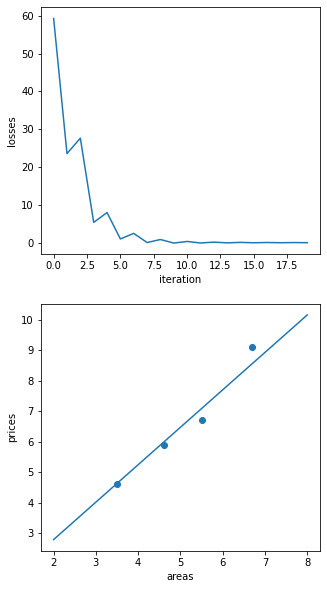

In [2]:
import numpy as np
from numpy import genfromtxt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1:]
data_size = areas.size

# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]
data = data.T

# init weight
eta = 0.01
theta = np.array([[-0.34], [0.04]]) #[w, b]
delta = 10 # hyperparameter

# how long
epoch_max = 10

# mini-batch size
m = 2

losses = [] # for debug
for epoch in range(epoch_max):
    for i in range(0, data_size, m):
        if i+m >= data_size:
            k = data_size
        else:
            k = i + m
        
        # get m samples
        x = data[:, i:k]
        y = prices[i:k, :]
        
        # predict z/o
        z = theta.T.dot(x)

        # calculate error
        err = z - y.T
        c1 = np.absolute(err) <= delta # condition
        
        # compute loss
        loss = np.where(c1, np.multiply(err, err), \
                        delta*np.absolute(err) - delta*delta/2)
        losses.append(np.mean(loss))
        
        # compute gradient
        gradients = np.where(c1, x*err, delta*x*err/np.absolute(err))
        gradients = gradients.sum(axis=1)/m
        gradients.resize(theta.shape)

        # update weights
        theta = theta - eta*gradients
        
print('theta: ', theta)

fig, axs = plt.subplots(2, 1, figsize=(5,10))
axs[0].plot(losses)
axs[0].set(xlabel='iteration', ylabel='losses')
axs[1].scatter(areas, prices)
axs[1].plot(np.linspace(2, 8, 400), \
            theta[0]*np.linspace(2, 8, 400) + theta[1])
axs[1].set(xlabel='areas', ylabel='prices')

#plt.plot(losses)
#plt.xlabel('iteration')
#plt.ylabel('losses')
#plt.show()

- N-sample naive implementation

theta:  [1.17759598 0.32147938]


[Text(0.5, 0, 'areas'), Text(0, 0.5, 'prices')]

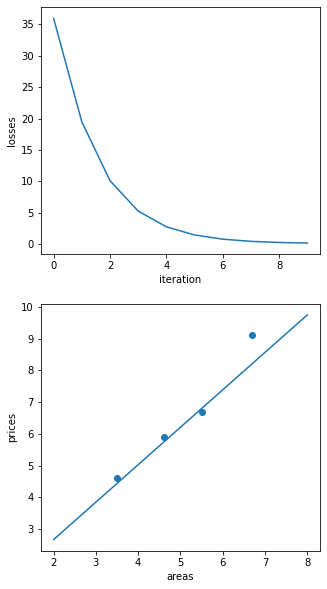

In [3]:
# load data
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1]
data_size = areas.size

# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]

n_epochs = 10
eta = 0.01

theta = np.array([-0.34, 0.04])
delta = 10

losses = [] # for debug
for epoch in range(n_epochs):
    sum_of_losses = 0
    gradients = np.zeros((2,))
    
    for index in range(data_size):
        xi = data[index]
        yi = prices[index]

        oi = xi.dot(theta)
        err = oi - yi
        
        if np.absolute(err) <= delta:
            # compute loss
            li = err*err/2  

            # compute gradient
            gradient_i = xi*err
        else:
            # compute loss
            li = delta*np.absolute(oi - yi) - delta*delta/2
            
            # compute gradient
            g_li = delta*err/np.absolute(err)
            gradient_i = xi*g_li
        
        gradients = gradients + gradient_i
        sum_of_losses = sum_of_losses + li
    
    sum_of_losses = sum_of_losses/data_size   
    losses.append(sum_of_losses) 
    
    gradients     = gradients/data_size    
    theta = theta - eta*gradients

print('theta: ', theta)

fig, axs = plt.subplots(2, 1, figsize=(5,10))
axs[0].plot(losses)
axs[0].set(xlabel='iteration', ylabel='losses')
axs[1].scatter(areas, prices)
axs[1].plot(np.linspace(2, 8, 400), \
            theta[0]*np.linspace(2, 8, 400) + theta[1])
axs[1].set(xlabel='areas', ylabel='prices')

- N-sample vectorization implementation

theta:  [[1.17759598]
 [0.32147938]]


[Text(0.5, 0, 'areas'), Text(0, 0.5, 'prices')]

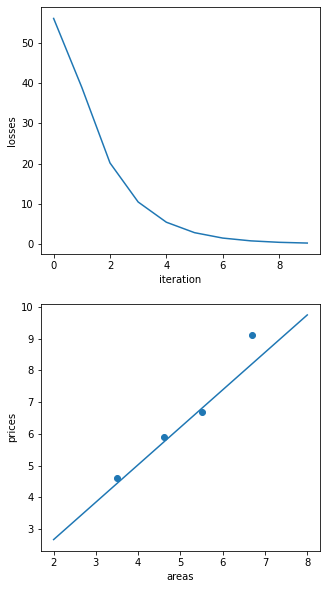

In [4]:
import numpy as np
from numpy import genfromtxt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1:]
data_size = areas.size

# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]
data = data.T

# init weight
eta = 0.01
theta = np.array([[-0.34], [0.04]]) #[w, b]
delta = 10 # hyperparameter

# how long
epoch_max = 10

# mini-batch size
m = 2

losses = [] # for debug
for epoch in range(epoch_max):
    
    # predict z/o
    z = theta.T.dot(data)

    # calculate error
    err = z - prices.T
    c1 = np.absolute(err) <= delta # condition
        
    # compute loss
    loss = np.where(c1, np.multiply(err, err), \
                    delta*np.absolute(err) - delta*delta/2)
    losses.append(np.mean(loss))
        
    # compute gradient
    gradients = np.where(c1, data*err, delta*data*err/np.absolute(err))
    gradients = gradients.sum(axis=1)/data_size
    gradients.resize(theta.shape)
    
    # update weights
    theta = theta - eta*gradients
        
print('theta: ', theta)

fig, axs = plt.subplots(2, 1, figsize=(5,10))
axs[0].plot(losses)
axs[0].set(xlabel='iteration', ylabel='losses')
axs[1].scatter(areas, prices)
axs[1].plot(np.linspace(2, 8, 400), \
            theta[0]*np.linspace(2, 8, 400) + theta[1])
axs[1].set(xlabel='areas', ylabel='prices')


**4. Xây dựng công thức linear regression cho N sample khi vector x có dạng sau:** 

$x = \begin{bmatrix}
sample_1 \\
... \\
sample_N
\end{bmatrix}$ **(sắp xếp theo chiều ngang, khác với chiều dọc trong bài học).**



For weight vector $\textbf{w} = \begin{bmatrix}
w_1 & w_2 & ... & w_m & b
\end{bmatrix} \in \mathbb{R}^{1 \times (m+1)}$
1. Pick all the N samples from training data 
\begin{equation}
\begin{aligned}
\textbf{X} = & \ \begin{bmatrix}
x_{11} & x_{12} & ... & x_{1m} & 1 \\
x_{21} & x_{22} & ... & x_{2m} & 1 \\
... \\
x_{N1} & x_{N2} & ... & x_{Nm} & 1
\end{bmatrix} \\
\\
           = & \ \begin{bmatrix}
sample_1 \\
sample_2 \\
... \\
sample_N
\end{bmatrix} \in \mathbb{R}^{N \times (m+1)} \\
\\
\textbf{y} = & \ \begin{bmatrix} y_1 & y_2 & ... & y_N \end{bmatrix} \in \mathbb{R}^{1 \times N}
\end{aligned}
\end{equation}

2. Calculate output o
$$\textbf{o} = \textbf{w}\textbf{X}^T \in \mathbb{R}^{1\times N}$$

3. Calculate losses
$$\textbf{L} = (\textbf{o} − \textbf{y}) \circ (\textbf{o} − \textbf{y}) \in \mathbb{R}^{1\times N}$$

4. Calculate gradients

\begin{equation}
\begin{aligned}
\textbf{L}_\textbf{w}' = & \ \frac{\partial \textbf{L}}{\partial \textbf{w}} \\
\\
                       = & \ \frac{\partial \textbf{L}}{\partial \textbf{o}} \frac{\partial \textbf{o}}{\partial \textbf{w}} \\
\\
                       = & \ \begin{bmatrix}
(o_1 - y_1)x_{11} & (o_1 - y_1)x_{12} & ... & (o_1 - y_1)x_{1m} & (o_1 - y_1) \\ 
(o_2 - y_2)x_{21} & (o_2 - y_2)x_{22} & ... & (o_2 - y_2)x_{2m} & (o_2 - y_2) \\
... \\
(o_N - y_N)x_{N1} & (o_N - y_N)x_{N2} & ... & (o_N - y_N)x_{Nm} & (o_N - y_N) 
\end{bmatrix} \\
\\
                       = & \ \textbf{X} \circ (\textbf{o} - \textbf{y})^T \in \mathbb{R}^{N\times (m+1)}
\end{aligned}
\end{equation}

5. Update weights
$$\textbf{w} = \textbf{w} - \frac{\eta}{N} \begin{bmatrix} 1 & 1 & ... & 1 \end{bmatrix}\textbf{L}_\textbf{w}' \in \mathbb{R}^{1 \times (m+1)}$$

Implementation was performed in Task 3 (N-sample vectorization implementation).

**5. Cài đặt linear regression cho bài toán advertising theo 2 cách (cách thông thường và vectorization) dùng m sample (mini-batch gradient descent).**

In [5]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
%matplotlib inline

In [6]:
# read data
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
# min-max normalization
normalized_df = (df - df.min()) / (df.max() - df.min())
normalized_df.head()

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.409449
3,0.509976,0.832661,0.511873,0.586614
4,0.609063,0.217742,0.510994,0.641732


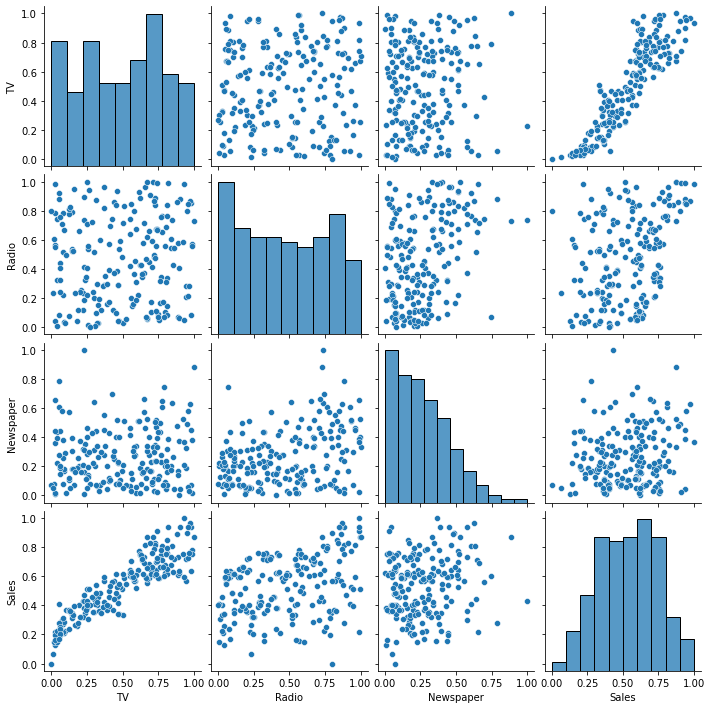

In [8]:
# visualize the relationship between the features
sns.pairplot(normalized_df)

In [9]:
train_df = normalized_df[:160].reset_index(drop=True)
test_df = normalized_df[160:].reset_index(drop=True)

In [10]:
data_size = train_df.shape[0]
data_size

160

- m-sample naive implementation:

In [11]:
# forward
def predict(x_1, x_2, x_3 , w_1, w_2, w_3, b):
    return x_1*w_1 + x_2*w_2 + x_3*w_3 + b

# compute gradient
def gradient(z, y, x_1, x_2, x_3):
    dw_1 = 2*x_1*(z-y)
    dw_2 = 2*x_2*(z-y)
    dw_3 = 2*x_3*(z-y)
    db = 2*(z-y)
    
    return (dw_1, dw_2, dw_3, db)

# update weights
def update_weight(w_1, w_2, w_3, b, n, dw_1, dw_2, dw_3, db):
    w_1_new = w_1 - n*dw_1
    w_2_new = w_2 - n*dw_2
    w_3_new = w_3 - n*dw_3
    b_new = b - n*db
    
    return (w_1_new, w_2_new, w_3_new, b_new)

In [12]:
# init weight
eta = 0.01
b = 0.04
w_1 = -0.34
w_2 = -0.34
w_3 = -0.34 

# how long
epoch_max = 50

# mini-batch size
m = 5

losses = [] # for debug
for epoch in range(epoch_max):
    
    # shuffle data
    train_df = shuffle(train_df)
    
    # convert to numpy array
    X_train = train_df.iloc[:, :-1].to_numpy()
    y_train = train_df.iloc[:, -1].to_numpy()
    
    for j in range(0, data_size, m):
        gradients = np.zeros(theta.shape)
        sum_of_losses = 0
        dw_1 = 0
        dw_2 = 0
        dw_3 = 0
        db = 0
        
        if j+m >= data_size:
            k = data_size
        else:
            k = j + m
            
        for index in range(j, k):
            # get a sample
            x_1 = X_train[index][0] # tv
            x_2 = X_train[index][1] # radio
            x_3 = X_train[index][2] # newspaper 
            y = y_train[index] # sales 

            
            # predict z
            z = predict(x_1, x_2, x_3 , w_1, w_2, w_3, b)

            # compute loss
            loss_i = (z-y)*(z-y)
            sum_of_losses = sum_of_losses + loss_i

            # compute gradient
            (dw_1i, dw_2i, dw_3i, dbi) = gradient(z, y, x_1, x_2, x_3)

            dw_1 = dw_1 + dw_1i
            dw_2 = dw_2 + dw_2i
            dw_3 = dw_3 + dw_3i
            db = db + dbi

        losses.append(sum_of_losses/(k-j))
        
        # update weights
        (w_1, w_2, w_3, b) = update_weight(w_1, w_2, w_3, b, eta, dw_1/(k-j), dw_2/(k-j), dw_3/(k-j), db/(k-j))
        print('w_new: ', w_1, w_2, w_3)
        print('b_new: ', b)
        print('\n\n')

w_new:  -0.3274555926840868 -0.3333482236377937 -0.3336987626028196
b_new:  0.05814101320245771



w_new:  -0.3174393254809035 -0.3216503383425127 -0.32557957744509564
b_new:  0.07676195065899521



w_new:  -0.30636287838994636 -0.3124354842472105 -0.32044037704921846
b_new:  0.0946767714018317



w_new:  -0.2941761882213902 -0.3005245632799809 -0.31653863625921885
b_new:  0.11298190041358579



w_new:  -0.28372023623332465 -0.29319880205977256 -0.313530025068727
b_new:  0.13006432334029355



w_new:  -0.27885087681147847 -0.28694209655226977 -0.3103100101758411
b_new:  0.14263280084076946



w_new:  -0.26889235449359894 -0.2786015117871337 -0.30549199465512855
b_new:  0.15849259992238762



w_new:  -0.2555923081782998 -0.26766905760883064 -0.2963708031152298
b_new:  0.176244209747008



w_new:  -0.2522606770840495 -0.2616554091624793 -0.29302166415093633
b_new:  0.1858473207194247



w_new:  -0.24740202580377904 -0.25550564470545944 -0.290137389341199
b_new:  0.1956055578198488



w_n

w_new:  0.09263991190997128 0.006716925482451718 -0.15238362910321798
b_new:  0.536724101460586



w_new:  0.09400424561673021 0.007799117643830679 -0.15184494236880056
b_new:  0.5384114600209993



w_new:  0.09375516162483645 0.007610849637163451 -0.151720001987138
b_new:  0.5369138555713855



w_new:  0.09481551569090316 0.008809568270676579 -0.15142539012974046
b_new:  0.5373004960228246



w_new:  0.09727024702080014 0.010484089191191849 -0.15029062679581062
b_new:  0.5399061269934529



w_new:  0.09755289469451851 0.0081820300088039 -0.15152621320904333
b_new:  0.537196516644933



w_new:  0.09762781970895354 0.007990073519812553 -0.15195820482129568
b_new:  0.5339273100502459



w_new:  0.09778662702236365 0.007653379148323338 -0.15216862666647443
b_new:  0.532293454940774



w_new:  0.09923072839033806 0.008157400564811916 -0.15156796965275898
b_new:  0.5338484823156733



w_new:  0.10031387033830019 0.008568382252388278 -0.1510934186312082
b_new:  0.5345632879296339



w_new:  

w_new:  0.2437162243718581 0.05914499555273754 -0.13109450092967814
b_new:  0.43474872006763293



w_new:  0.24341758646157513 0.05880371057462506 -0.13139786392780164
b_new:  0.4330930690708894



w_new:  0.24396067056022752 0.059070340466158916 -0.13124254934567986
b_new:  0.43379076530381283



w_new:  0.24455808562897624 0.060039253166445865 -0.13115882931926148
b_new:  0.4341661275011345



w_new:  0.24505340496435302 0.060546188347488115 -0.1309418965795313
b_new:  0.4342961009004139



w_new:  0.24589167206317947 0.06004553032563969 -0.13117245752595436
b_new:  0.4333637201521017



w_new:  0.24565050007706266 0.059850386240619356 -0.13138388884443666
b_new:  0.4321694747053476



w_new:  0.24535669627304377 0.05957014374346386 -0.13147891102283385
b_new:  0.43114330532126655



w_new:  0.24584905930276618 0.05955718983130696 -0.13130930210754108
b_new:  0.4308691798468351



w_new:  0.24670985480836416 0.06016736172817237 -0.1311212423749809
b_new:  0.43118420573124694



w_new

w_new:  0.36595556669788093 0.1015288040335498 -0.10922004993433651
b_new:  0.3425705850878019



w_new:  0.3655966514329262 0.10108661548239058 -0.1096829764688137
b_new:  0.34085651046465687



w_new:  0.3662788497344282 0.10145757998397086 -0.10979157924829495
b_new:  0.3406663689779972



w_new:  0.36739822306756637 0.10240110437543738 -0.10934832294727388
b_new:  0.3417280905940989



w_new:  0.36810003262271507 0.10310691369740276 -0.10951369742918475
b_new:  0.34200016874525463



w_new:  0.36938265017418914 0.10430451724412942 -0.10887658080134097
b_new:  0.3437191044424751



w_new:  0.36928427476734726 0.10409182530233652 -0.10875935108828234
b_new:  0.34317334998792426



w_new:  0.3696415544831113 0.1047051677675565 -0.10850979223168489
b_new:  0.3435516244842944



w_new:  0.3701513055347056 0.10510825703853113 -0.1086626048328451
b_new:  0.3432726566532327



w_new:  0.37017420819129276 0.10491462027992858 -0.10870013702736002
b_new:  0.3425453634038332



w_new:  0.37106

b_new:  0.2732537989896934



w_new:  0.4594042729535833 0.13976339245580935 -0.08603100304818652
b_new:  0.27362584733305245



w_new:  0.45917977576871366 0.13941744190293234 -0.08635462798516876
b_new:  0.2724601141555486



w_new:  0.45889650908411633 0.1391393178429049 -0.0865972825250193
b_new:  0.2708975975891501



w_new:  0.45892855679827893 0.13825925868436514 -0.08702808519381797
b_new:  0.2698278047472603



w_new:  0.4589554937948471 0.13828913221605726 -0.08701813237933993
b_new:  0.26972590042521216



w_new:  0.4596046450466348 0.13888878845857822 -0.08679365769112343
b_new:  0.270579695246626



w_new:  0.45963410197150756 0.13855123507617392 -0.0869921471858433
b_new:  0.26926800282682384



w_new:  0.459626367652303 0.13826294467729805 -0.08723378769019371
b_new:  0.26862151038464666



w_new:  0.45935432967691375 0.1382253085899297 -0.0873882862758522
b_new:  0.26786460369774173



w_new:  0.459154913906695 0.13843967535753926 -0.08719817054948771
b_new:  0.26754122

w_new:  0.5101367245054972 0.15900999089812728 -0.07196214364147133
b_new:  0.22897453292617903



w_new:  0.5109866524596564 0.15978712382143262 -0.07146494947963214
b_new:  0.22968842850791868



w_new:  0.5113889710896953 0.16023726709021835 -0.07126351085800961
b_new:  0.22986824320953034



w_new:  0.511802279064289 0.16073800348548117 -0.0711801053372774
b_new:  0.2304717321940472



w_new:  0.5122673568750444 0.16086526896632627 -0.07107636145900871
b_new:  0.23075772687097437



w_new:  0.511947595680795 0.1605385412496494 -0.07137537567639686
b_new:  0.22969669337824242



w_new:  0.5116626095080513 0.16050160687071763 -0.07140602931594175
b_new:  0.22915337174658254



w_new:  0.5118007828244321 0.1601432510161014 -0.07147764874415621
b_new:  0.2281915945234598



w_new:  0.5118529184125193 0.1601366450400734 -0.07144882501648862
b_new:  0.2279275040693641



w_new:  0.5122941659494178 0.16040770942507132 -0.07134413063596602
b_new:  0.22858765969935954



w_new:  0.512538407

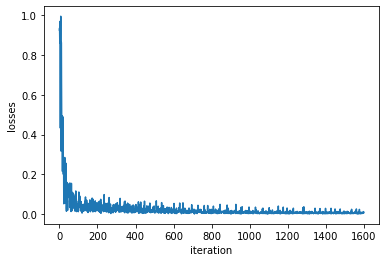

In [13]:
# plotting
plt.plot(losses) 
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

In [14]:
# evaluation
losses = [] # for debug

# convert to numpy array
X_test = test_df.iloc[:, :-1].to_numpy()
y_test = test_df.iloc[:, -1].to_numpy()
    
for i in range(X_test.shape[0]):
    x_1 = X_test[i][0] # tv
    x_2 = X_test[i][1] # radio
    x_3 = X_test[i][2] # newspaper 
    y = y_test[i] # sales 
    
    # predict z
    z = predict(x_1, x_2, x_3 , w_1, w_2, w_3, b)
    
    # compute loss
    loss_i = (z-y)*(z-y)
    losses.append(loss_i)

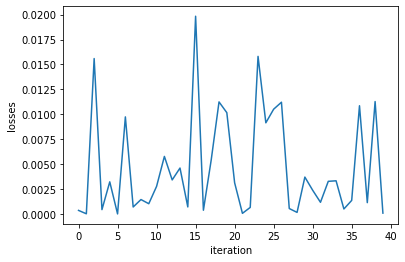

In [15]:
# plotting
plt.plot(losses) 
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

- m-sample vertorization implementation:

In [16]:
# forward
def predict(x, theta):
    return x.dot(theta)

# compute gradient
def gradient(z, y, x):
    dtheta = 2*x*(z-y)
    
    return dtheta

# update weights
def update_weight(theta, n, dtheta):
    dtheta_new = theta - n*dtheta
    
    return dtheta_new

In [17]:
# init weights
n = 0.01
theta = np.array([-0.34, -0.34, -0.34, 0.04]) #[w, b]

# how long
epoch_max = 50

# mini-batch size
m = 5

# to plot
losses = [] 

# train
for epoch in range(epoch_max):
    # shuffle data
    train_df = shuffle(train_df)
    
    # convert to numpy array
    X_train = train_df.iloc[:, :-1].to_numpy()
    y_train = train_df.iloc[:, -1].to_numpy()
    
    # concatenate ones-column [X, 1]
    X_train_ = np.c_[X_train, np.ones((data_size, 1))]
    
    for j in range(0, data_size, m):
        
        if j+m >= data_size:
            k = data_size
        else:
            k = j + m
        
        # get m samples
        x = X_train_[j:k]
        y = y_train[j:k]

        # predict z
        z = predict(x, theta)

        # compute loss
        loss = (z-y)*(z-y)
        losses.append(np.mean(loss))
        
        # compute gradient
        z.resize((y.shape[0],1))
        y.resize((y.shape[0],1))
        dtheta = gradient(z, y, x)

        # update weights
        theta = update_weight(theta, n, dtheta.sum(axis=0)/(k-j))
        print('theta_new: ', theta)
        print('\n\n')
        
        

theta_new:  [-0.32381212 -0.32924623 -0.33382017  0.06055493]



theta_new:  [-0.31337798 -0.32463305 -0.33038566  0.07648729]



theta_new:  [-0.30056668 -0.31089902 -0.32195845  0.09637868]



theta_new:  [-0.29455882 -0.30393138 -0.31675998  0.11013061]



theta_new:  [-0.28838781 -0.29226558 -0.31169498  0.12537558]



theta_new:  [-0.27882363 -0.28079331 -0.30600164  0.14262347]



theta_new:  [-0.27119129 -0.27264724 -0.30233433  0.15748929]



theta_new:  [-0.25785264 -0.2612959  -0.29871195  0.17540842]



theta_new:  [-0.25303572 -0.25386302 -0.29416475  0.18704298]



theta_new:  [-0.24186401 -0.2411581  -0.28689672  0.20432037]



theta_new:  [-0.23459532 -0.23546178 -0.28152005  0.21520642]



theta_new:  [-0.22221242 -0.22802842 -0.2753333   0.23063527]



theta_new:  [-0.21268378 -0.21985839 -0.26962977  0.24478813]



theta_new:  [-0.20841716 -0.21308775 -0.26724383  0.25510512]



theta_new:  [-0.19822636 -0.20561929 -0.26474214  0.26832373]



theta_new:  [-0.19115143 

theta_new:  [ 0.15205509  0.03248247 -0.14187315  0.50241503]



theta_new:  [ 0.15140371  0.03033694 -0.14243595  0.49855446]



theta_new:  [ 0.15212372  0.02924613 -0.14328215  0.49713889]



theta_new:  [ 0.15388019  0.02989808 -0.14229165  0.49833023]



theta_new:  [ 0.15511606  0.03071899 -0.14180553  0.49967558]



theta_new:  [ 0.1554067   0.03088804 -0.14162207  0.49945913]



theta_new:  [ 0.15639125  0.0310715  -0.14096074  0.5002836 ]



theta_new:  [ 0.1569625   0.03148378 -0.14079433  0.50029981]



theta_new:  [ 0.15775641  0.031415   -0.14042799  0.49988711]



theta_new:  [ 0.1599264   0.03320071 -0.13941504  0.5023804 ]



theta_new:  [ 0.15938841  0.03086755 -0.13995892  0.49837388]



theta_new:  [ 0.15971715  0.03109142 -0.13985415  0.49811923]



theta_new:  [ 0.16129442  0.03324098 -0.13897461  0.49978712]



theta_new:  [ 0.16179246  0.03390736 -0.13909399  0.49903625]



theta_new:  [ 0.16136097  0.03282885 -0.13933173  0.4958349 ]



theta_new:  [ 0.16186511 

theta_new:  [ 0.29698371  0.0785445  -0.12028329  0.39387547]



theta_new:  [ 0.29788908  0.07909221 -0.12036558  0.39391901]



theta_new:  [ 0.29905092  0.08019526 -0.11996221  0.39468983]



theta_new:  [ 0.29924995  0.08031362 -0.11999709  0.39439119]



theta_new:  [ 0.30007559  0.0804497  -0.11961294  0.39457903]



theta_new:  [ 0.30214316  0.08223539 -0.11882175  0.39711233]



theta_new:  [ 0.30191698  0.08175151 -0.11915957  0.39606485]



theta_new:  [ 0.30186235  0.08105749 -0.11931082  0.39443362]



theta_new:  [ 0.30136128  0.08059601 -0.11977788  0.3935267 ]



theta_new:  [ 0.30128859  0.08031475 -0.11973013  0.39300811]



theta_new:  [ 0.30099287  0.08004729 -0.1198271   0.39200253]



theta_new:  [ 0.30092657  0.07997021 -0.11984813  0.39172174]



theta_new:  [ 0.30165622  0.08071082 -0.11960631  0.39165759]



theta_new:  [ 0.30167083  0.08058425 -0.11967115  0.39136082]



theta_new:  [ 0.30136369  0.08024764 -0.12005052  0.38932333]



theta_new:  [ 0.30253018 




theta_new:  [ 0.4145106   0.12221964 -0.09702284  0.30789782]



theta_new:  [ 0.41511447  0.12273165 -0.09698826  0.30836841]



theta_new:  [ 0.41533564  0.12178104 -0.09740331  0.3072459 ]



theta_new:  [ 0.41574649  0.12198613 -0.09747018  0.30713669]



theta_new:  [ 0.41554016  0.12188954 -0.09754201  0.30659234]



theta_new:  [ 0.41595783  0.12200396 -0.09730517  0.30641634]



theta_new:  [ 0.41617795  0.12201141 -0.09711762  0.30631646]



theta_new:  [ 0.41640176  0.12196039 -0.0969691   0.30621217]



theta_new:  [ 0.41742651  0.12290744 -0.09644249  0.30693716]



theta_new:  [ 0.41784128  0.12327113 -0.09630927  0.30738032]



theta_new:  [ 0.41766423  0.12310787 -0.09644408  0.30646406]



theta_new:  [ 0.41728504  0.12290309 -0.09645718  0.30553243]



theta_new:  [ 0.41842703  0.12380883 -0.09584201  0.3061717 ]



theta_new:  [ 0.41825828  0.12240225 -0.09595468  0.30424978]



theta_new:  [ 0.41874578  0.12309965 -0.09569842  0.30421462]



theta_new:  [ 0.418862

theta_new:  [ 0.47448623  0.14512503 -0.08210553  0.2572143 ]



theta_new:  [ 0.47465816  0.14518476 -0.08200234  0.25733648]



theta_new:  [ 0.47497968  0.14544522 -0.08192883  0.25770185]



theta_new:  [ 0.4749416   0.14565451 -0.08181867  0.2574948 ]



theta_new:  [ 0.47535406  0.14518069 -0.08156348  0.25655311]



theta_new:  [ 0.47500071  0.14512578 -0.0814462   0.25621617]



theta_new:  [ 0.47530241  0.14530118 -0.08131424  0.25566924]



theta_new:  [ 0.47579919  0.14560302 -0.08086796  0.25622991]



theta_new:  [ 0.47667281  0.14618128 -0.0805151   0.2571739 ]



theta_new:  [ 0.47664023  0.1459635  -0.08052118  0.25681995]



theta_new:  [ 0.47593613  0.14558667 -0.0807585   0.25559697]



theta_new:  [ 0.47545201  0.14529962 -0.08115349  0.2540369 ]



theta_new:  [ 0.47520948  0.14415105 -0.08135548  0.25179838]



theta_new:  [ 0.47554906  0.14427834 -0.08134575  0.25167053]



theta_new:  [ 0.47631056  0.14476702 -0.08134244  0.25264645]



theta_new:  [ 0.47643615 

theta_new:  [ 0.53155685  0.16724991 -0.06450892  0.21084833]



theta_new:  [ 0.53207524  0.16760298 -0.06422308  0.21180179]



theta_new:  [ 0.53231395  0.16799976 -0.06411799  0.21202783]



theta_new:  [ 0.53180459  0.16767044 -0.06423237  0.21117932]



theta_new:  [ 0.53229581  0.16804594 -0.06394589  0.21199836]



theta_new:  [ 0.53180667  0.16781565 -0.06408822  0.21109491]



theta_new:  [ 0.53240529  0.16860762 -0.06362045  0.2115    ]



theta_new:  [ 0.53225569  0.16759086 -0.06385437  0.20993984]



theta_new:  [ 0.53244354  0.16755658 -0.06409092  0.20907542]



theta_new:  [ 0.53219013  0.16736304 -0.06409434  0.20875004]



theta_new:  [ 0.53248154  0.16768754 -0.06384847  0.2089616 ]



theta_new:  [ 0.53266471  0.16774606 -0.06380689  0.20900843]



theta_new:  [ 0.53242858  0.16774795 -0.06377524  0.20852042]



theta_new:  [ 0.53340631  0.16856288 -0.0635478   0.2099062 ]



theta_new:  [ 0.53328243  0.16854044 -0.06356292  0.2096257 ]



theta_new:  [ 0.53406832 

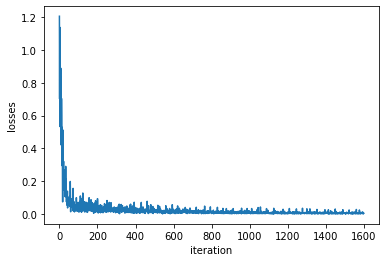

In [18]:
# plotting
plt.plot(losses) 
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

In [19]:
# evaluation
losses = [] # for debug

# convert to numpy array
X_test = test_df.iloc[:, :-1].to_numpy()
y_test = test_df.iloc[:, -1].to_numpy()

# concatenate ones-column [X, 1]
X_test_ = np.c_[X_test, np.ones((X_test.shape[0], 1))]

for i in range(X_test.shape[0]):
    x = X_test_[i]
    y = y_test[i] # sales 
    
    # predict z
    z = predict(x, theta)
    
    # compute loss
    loss_i = (z-y)*(z-y)
    losses.append(loss_i)

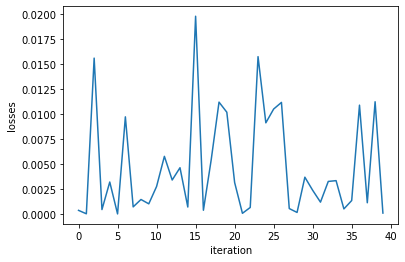

In [20]:
# plotting
plt.plot(losses) 
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()